## Task 3
Suppose, you are given the information that a student answered 8 out of 10 yes/no questions correctly

- Define the prior

#### Hypotheses:
A set of nested hypotheses: <br>
H0: The correct answers were based on guesses <br>
H1: The correct answers were based on knowledge (not guessing)

#### Prior: 
Whether the student is guessing (Group A) or answering based on knowledge (Group B) is assumed to be equally likely. <br>
Prior Distribution: Bernoulli(0.5)

- Determine the posterior

#### Data: 
8 out of 10 questions were correctly answered by a student (One observation)

#### Likelihood:
Binomial distribution: n = 10, k = number of correct answers for the student, q = probability of success

For Group A (H0): <br>
Guesses either Yes or No - <br>
q = 0.5 

For Group B (H1): <br>
Uses knowledge to answer. Could perform better or worse. <br>
We can take uniform distribution of success rates for 10 questions over the whole range <br>
q ~ Uniform(0, 1)

#### Posterior:
Estimate success rate for each group for the given data (guessing or not)

In [1]:
%matplotlib inline
import sys
import numpy as np
sys.path.insert(0,'../code')
from thinkbayes import Suite
from scipy.stats import binom, uniform
from scipy.integrate import quad

import matplotlib.pyplot as plt

In [2]:
def integrand(x, k):
    return binom.pmf(k, 10, x)

class TestPerformance(Suite):

    def Likelihood(self, data, hypo):
        if hypo == 'A':
            return binom.pmf(data, 10, 0.5)
        else:
            ans, err = quad(integrand, 0, 1, args=(data))
            return ans
        
hypos = ['A', 'B']
suite = TestPerformance(hypos)
suite.Update(8)

print("Posterior Values")
suite.Print()

Posterior Values
A 0.325872284398
B 0.674127715602


- Apply the Savage-Dickey method and provide a plot of the estimation procedure

In [3]:
bayes_factor_AB = suite.Likelihood(8, 'A')/suite.Likelihood(8, 'B')
print("Bayes Factor")
print(bayes_factor_AB)

Bayes Factor
0.4833984375


Value shows anecdotal evidence for Group B i.e. H1

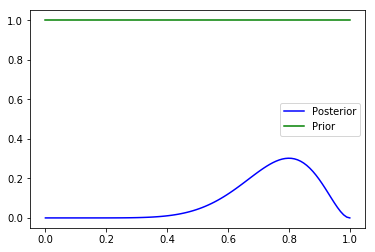

In [5]:
##### NOT SURE HOW
# For the Savage Dickey density ratio, only consider H1 to obtain Bayes Factor - <br>
# Divide height of posterior by height of prior at 0.5.
# Use uniform prior and data 8 (out of 10)

### NEEDS TO BE FIXED!
# q_vals = np.linspace(0.0, 1.0, 100)
# post_vals = []
# for q in q_vals:
#     post_vals.append(binom.pdf(8, 10, q))
    
# plt.plot(q_vals, post_vals, color='blue', label='Posterior')
# plt.plot(q_vals, uniform.pdf(q_vals), color='green', label='Prior')
# plt.legend()
# plt.show()